# Exploratory Data Analysis of the Final Dataset

In [19]:
# Importing necessary libraries for exploratory data analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Importing
In this section we will be reading a data from a csv. Here will be using the preprocessed dataset-final csv file that contains derogatory tweets from different twitter users.

In [20]:
# Load the data into pandas dataframe and check the data structure
df_raw = pd.read_csv("../res/dataset-final.csv")
df_raw.head()

,text,HATE,NOT,OFFN,PRFN,Race,Religion,Gender,Other,None
0,"['i', 'do', 'not', 'think', 'i', 'am', 'gettin...",0,1,0,0,0,0,0,0,1
1,"['we', 'can', 'not', 'continue', 'calling', 'o...",0,1,0,1,0,0,0,0,1
2,"['nawt', 'you', 'all', 'niggers', 'ignoring', ...",1,0,0,1,1,0,0,0,1
3,"['i', 'am', 'bit', 'confused', 'coz', 'chinese...",1,0,1,1,1,0,0,0,0
4,"['this', 'bitch', 'in', 'whataburger', 'eating...",1,0,1,1,1,0,1,0,0


## Dataset and Data Attributes
Here, we're going to check the attributes of the dataset for us to have a better understanding of the dataset we are working on. We are also dropping unnecessary columns. It is because they have no use in the process of exploratory data analysis.


In [21]:
# Check the number of rows and columns
print("Number of rows in data =",df_raw.shape[0])
print("Number of columns in data =",df_raw.shape[1])

Number of rows in data = 20148
Number of columns in data = 10


In [22]:
# Drop 'text' column
df_raw.drop(columns=['text'], inplace=True)
df_raw.head()

,HATE,NOT,OFFN,PRFN,Race,Religion,Gender,Other,None
0,0,1,0,0,0,0,0,0,1
1,0,1,0,1,0,0,0,0,1
2,1,0,0,1,1,0,0,0,1
3,1,0,1,1,1,0,0,0,0
4,1,0,1,1,1,0,1,0,0


In [23]:
# Check the data types of each column
df_raw.dtypes

HATE        int64
NOT         int64
OFFN        int64
PRFN        int64
Race        int64
Religion    int64
Gender      int64
Other       int64
None        int64
dtype: object

## Data Visualization and Interpretation
In this section, we are going to visualize the dataset that we have by using graphs. With these, we would be able to have a better understanding of the statistics of different hate speech categories based on the derogatory tweets of other Twitter users. We will also provide interpretations and insights into each visualization.


C:\Users\Fujitsu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


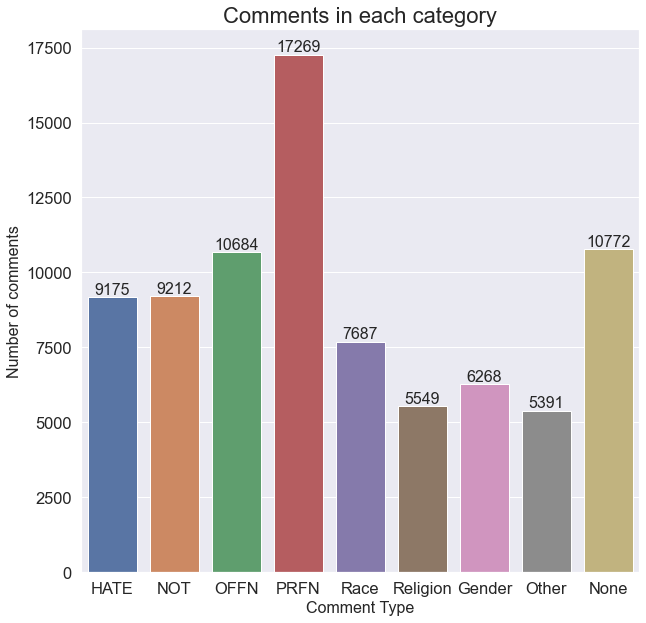

In [24]:
# Count the number of comments under each label.
categories = list(df_raw.columns.values)
sns.set(font_scale = 1.5)
plt.figure(figsize=(10,10))

ax= sns.barplot(categories, df_raw.iloc[:,:].sum().values)
plt.title("Comments in each category", fontsize=22)
plt.ylabel('Number of comments', fontsize=16)
plt.xlabel('Comment Type', fontsize=16)
# #adding the text labels
rects = ax.patches
labels = df_raw.iloc[:,:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom', fontsize=16)
plt.show()

By looking at the graph, we observed that between the HATE and NOT categories, almost 50% of the data in our dataset is in the HATE category. This means that half of our dataset contains hateful comments or tweets. Next, among the HATE, OFFN, and PRFN categories, PRFN is leading with 17269 comments. This means that the most hateful comments are geared towards profanity. Lastly, for the hateful speech towards targeted groups, the most targeted group is the race group. This only means that racism is rampant and garnered the most attention in the data.

[6386 5497 5255 1829  859  294   28]


C:\Users\Fujitsu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


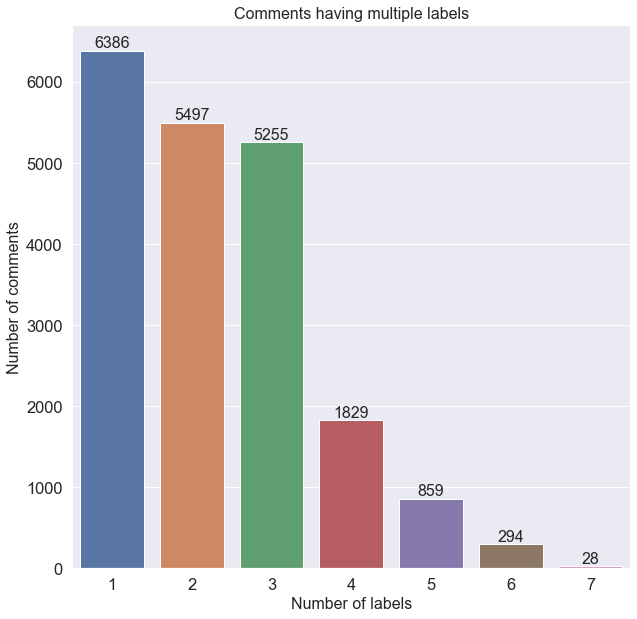

In [27]:
# Counting the number of comments having multiple labels.
rowSums = df_raw.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[:]
sorted_index = multiLabel_counts.index.sort_values(ascending=True)
print(multiLabel_counts.values)
sns.set(font_scale = 1.5)
plt.figure(figsize=(10,10))
ax = sns.barplot(sorted_index, multiLabel_counts.values)
plt.title("Comments having multiple labels", fontsize=16)
plt.ylabel('Number of comments', fontsize=16)
plt.xlabel('Number of labels', fontsize=16)
#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom', fontsize=16)
plt.show()

On the graph, we can see the comments that have multiple labels. The labels are the categories of hate speech, which are HATE, NOT, OFFN, PRFN, Race, Religion, Gender, Others, and None. Having multiple labels in a comment means that more categories of hate speech are committed. On the graph, we observed that most of the comments only have one label, with 6386 comments. This means that most of the comments or tweets have only one type of hate speech category.